In [2]:
import requests
import zipfile
from pathlib import Path
import torch
import torch.nn as nn
print(torch.__version__)

2.0.0+cu117


In [3]:
device="cuda" if torch.cuda.is_available() else "gpu"
print(f"using device:{device}")

using device:cuda


In [4]:
! nvidia-smi

Wed Feb 28 02:07:26 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   42C    P8     2W /  N/A |    353MiB /  4096MiB |     31%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

1) Get Data:  Food classification :Food101
but we are goint to use dataset which has only 3 claasses and 100 images per class

In [5]:
# create a directory for downloading the dataset
data_path=Path("data/")
image_path=data_path/"pizza_steak_sushi"

# if image folder doesn't exists, download it and prepare it
if image_path.is_dir():
  print(f"{image_path}  directory already exists..skipping download")
else:
  print(f"{image_path}  directory does not exists exists..creating one")
  image_path.mkdir(parents=True, exist_ok=True)

# download pizza_steak_sushi data
with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downloading data")
  f.write(request.content)

# unzipping the zip file
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("unzipping pizza_steak_sushi data")
  zip_ref.extractall(path=image_path)



data\pizza_steak_sushi  directory already exists..skipping download


downloading data
unzipping pizza_steak_sushi data


Exploreing the data

In [6]:
import os
# print(list(os.walk(data_path/"pizza_steak_sushi")))

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(data_path/"pizza_steak_sushi"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

walk_through_dir(data_path/"pizza_steak_sushi")

there are 2 directories and 0 images in data\pizza_steak_sushi.
there are 3 directories and 0 images in data\pizza_steak_sushi\test.
there are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza.
there are 0 directories and 19 images in data\pizza_steak_sushi\test\steak.
there are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi.
there are 3 directories and 0 images in data\pizza_steak_sushi\train.
there are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza.
there are 0 directories and 75 images in data\pizza_steak_sushi\train\steak.
there are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi.


In [7]:
# setup training and testing paths
train_dir=image_path/"train"
test_dir=image_path/"test"
print(train_dir, test_dir)

data\pizza_steak_sushi\train data\pizza_steak_sushi\test


### visualizing data
Steps 1) get all images path
2) pick random images  random.choices()
3) get the image class name using "pathlib.Path.parent.stem
4) since we are working with imahges, lets open imagw woth Pythion's PIL library

In [8]:
image_path

WindowsPath('data/pizza_steak_sushi')

300


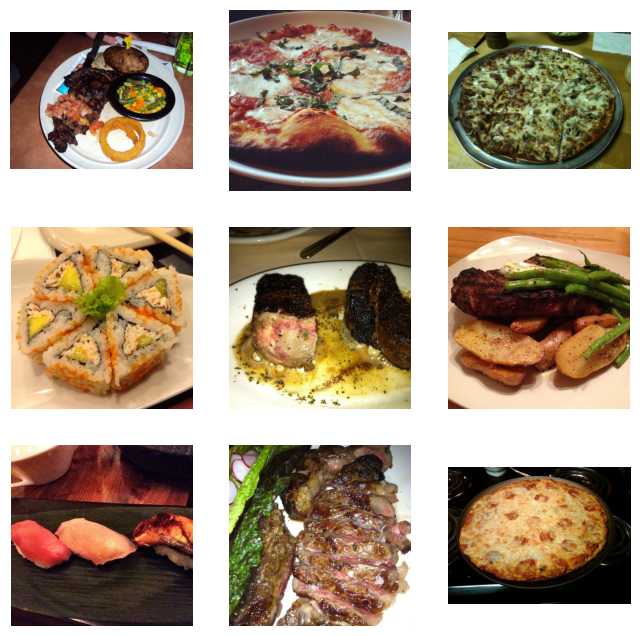

In [9]:
import random
import PIL
import glob
from PIL import Image
from matplotlib import pyplot as plt

random.seed(42)
images_paths=glob.glob(pathname=rf"{image_path}/*/*/*.jpg")
print(len(images_paths))
random_images_paths=random.choices(images_paths,k=9)
fig = plt.figure(figsize=(8, 8))
for index, path in enumerate(random_images_paths):
  image=Image.open(path)
  ax=fig.add_subplot(3,3,index+1)
  ax.imshow(image)
  ax.axis("off")
plt.show()

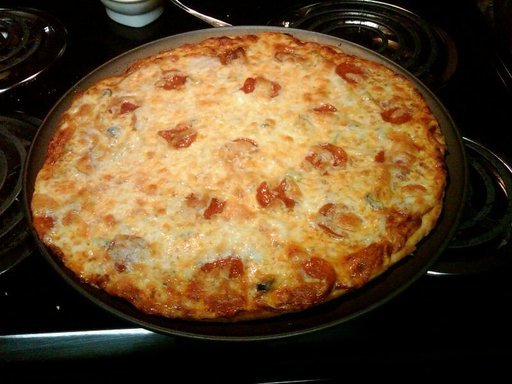

In [10]:
image

In [11]:
import numpy as np
img_array=np.asarray(image)
img_array

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [8, 7, 2],
        [5, 6, 1],
        [6, 8, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [6, 5, 0],
        [3, 4, 0],
        [2, 4, 0]],

       [[0, 2, 1],
        [0, 2, 1],
        [1, 1, 1],
        ...,
        [6, 5, 0],
        [4, 5, 0],
        [0, 2, 0]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### Tranaforming our data into tensor format
1. turn target data into tensots
2. turn it into "torch.utils.data.Dataset and subsequently torch.utils.data
---



In [12]:
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# transforming data using transfors

In [13]:
data_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5), # filp the image on the horizontal
    # turn thr image into torcch tensor
    transforms.ToTensor()
])

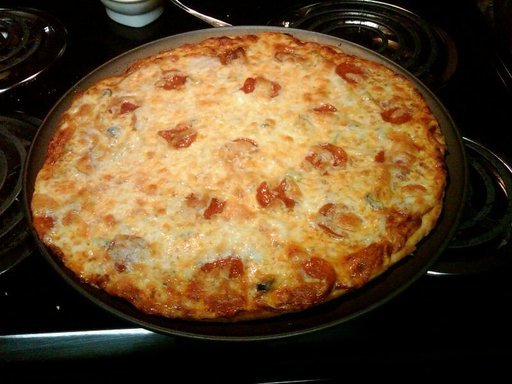

In [14]:
image

In [15]:
img_transformed=data_transforms(image)

In [16]:
def plot_transformed_images(image_paths: list, transforms, n=3, seed=None):
  """
  Selects random images from the path of images and loads/transforms them then plots original vs transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(images_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(nrows=1, ncols=2)
      #plot original
      ax[0].imshow(f)
      ax[0].set_title(f"original\nSize:{f.size}")
      ax[0].axis("off")
      # plot transformed
      transformed_image=transforms(f) # this changes the shape to c,h,w, but matplotlib supports h,w,c
      transformed_image=transformed_image.permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")
      # fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


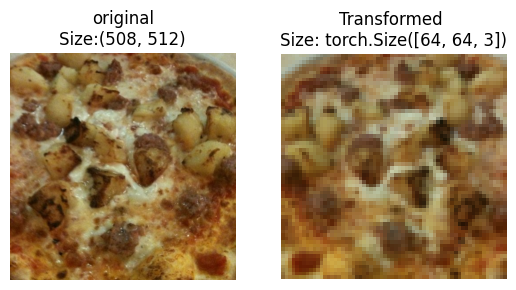

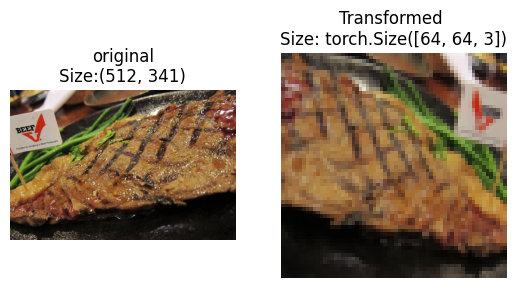

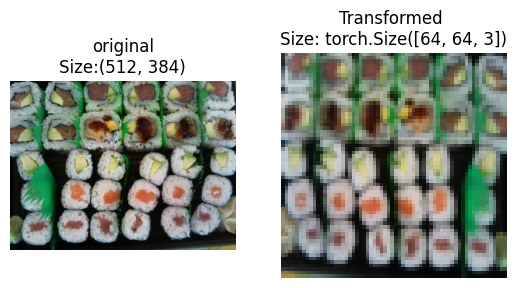

In [17]:
plot_transformed_images(image_paths=images_paths,transforms=data_transforms, n=3, seed=4)

### There are prebuilt dataset function for loading all our image and applying transformations
Base classes for custom datasets
link: https://pytorch.org/vision/0.16/datasets.html#base-classes-for-custom-datasets
we can load image classification data using torchvision.datasets.ImageFolder 



In [18]:
# use image folder to create dataset
from torchvision.datasets import ImageFolder
train_data=ImageFolder(root=train_dir, 
                       transform=data_transforms, # tranaforms for the data
                       target_transform=None      # tranaforms for the labels
                         ) 
test_data=ImageFolder(root=test_dir, 
                       transform=data_transforms, # tranaforms for the data
                       target_transform=None      # tranaforms for the labels
                         ) 

In [19]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
len(train_data),len(test_data)

(225, 75)

In [23]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [24]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [25]:
img,label=train_data[0][0],train_data[0][1]
print(f"Image Tensor: {img}")
print(f"Image Label : {label}")
print(f"image datatype: {img.dtype}")
print(f"label datatype: {type(label)}")

print(f"image shape: {img.shape}")

Image Tensor: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [26]:
class_names[label]

'pizza'

(-0.5, 63.5, 63.5, -0.5)

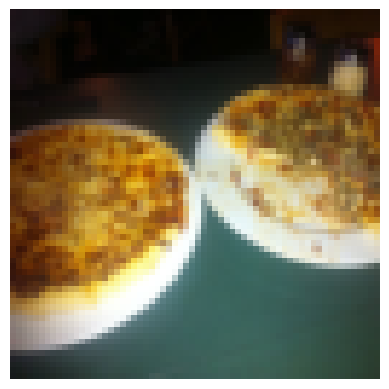

In [27]:
# plot this image
plt.figure()
plt.imshow(img.permute(1,2,0))   # we need to rearrange to use image with matplotlib
plt.axis("off")

# Get dataloader for training
turn loaded images into dataloader

In [28]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=os.cpu_count())
test_dataloader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False,num_workers=os.cpu_count())
train_dataloader


# visualize data from train_dataloader

In [29]:
print(len(train_dataloader), len(test_dataloader))
# iterate over dataloader to see 
img, label=next(iter(train_dataloader))

8 3


In [30]:
print(f"image shape:{img.shape}")  # batch size, channels h,w

image shape:torch.Size([32, 3, 64, 64])


What if we dont have dataloader available for our use case....need custom 

### Loading image data with custom dataset
1. want to be able to load images from file
2. want to be able to get class names from dataset
3. want to able to get classes as dictionary from the dataset

Pros: crete a dataset out of almost anything 
* not limited to pytorch prebuilt "Dataset" function
COns:
* even though you could creata a dataset out of almosr anything it does mean that it will automically work.
* using a custom dataset often results writinng in us writing more code which could be prone to errors or performance issues


In [31]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [32]:
# instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx   # we want to replicate this functionality


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### creating a helper function to get class names
we want a fucntion to
1. get the class names  using 'os.scandir()' to traverse a target directory (ideally the directory is in standard image classification format)
2. raise an error if class names are not found( if this happens, there is something wrong with the directory structure)
3. turn the class names into list and dict and return them

In [33]:
# setup path for the target directoy
target_directory=train_dir
print(f"target dir: {target_directory}")

# get the class names from target directory
class_names_found=sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found


target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [34]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [35]:
def find_classes(directory:str) -> Tuple[list[str], Dict[str, int]]:
    """finds the class folder names in a target directory"""
    # 1. get the class names by scanning the directory
    classes=sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()])

    # 2. raise an error id class names could not be found
    if not classes:
        raise FileNotFoundError(f"couldn't find any class in {directory}...please check file structure.")
    
    #. create a dictionary of class names
    class_to_idx={class_name : i for i, class_name in enumerate(classes)}
    return classes, class_to_idx


In [36]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### create a custom dataset
things to keep in mind: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

torch.utils.data.Dataset(*args, **kwds)[SOURCE]
An abstract class representing a Dataset.

All datasets that represent a map from keys to data samples should subclass it. All subclasses should overwrite __getitem__(), supporting fetching a data sample for a given key. Subclasses could also optionally overwrite __len__(), which is expected to return the size of the dataset by many Sampler implementations and the default options of DataLoader. Subclasses could also optionally implement __getitems__(), for speedup batched samples loading. This method accepts list of indices of samples of batch and returns list of samples.


To create out own dataset we want to :
1. subclass "torch.utils.data.Dataset'
2. init our subclass with a target directory ( the direftory we would like to get the data from as wekk as transforms if we'd like to transfer the data)
3. create several attricutes 
    * paths--> paths of our images
    * transforms --> transforms we would like to do
    * classes --> a list of target classes
    * class_to_idx --> a dict of target classes mapped to integer labels
4. create a functuion to 'load_images()'  this func will open an image
5. oberwrite the "__len__" method to return the lenght of our dataset
6. overwrite the '__getitem()__' method to retun a giben sample when passed an index

In [37]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [38]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [39]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x23853823c10>,
 <__main__.ImageFolderCustom at 0x23853822230>)

In [40]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [41]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [42]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [43]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


You know what time it is!

Time to put on our data explorer's hat and visualize, visualize, visualize!

Let's create a helper function called display_random_images() that helps us visualize images in our Dataset's.

Specifically, it'll:

1. Take in a Dataset and a number of other parameters such as classes (the names of our target classes), the number of images to display (n) and a random seed.
2. To prevent the display getting out of hand, we'll cap n at 10 images.
3. Set the random seed for reproducible plots (if seed is set).
4. Get a list of random sample indexes (we can use Python's random.sample() for this) to plot.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes found in step 4 and plot them with matplotlib.
7. Make sure the sample images are of shape HWC (height, width, color channels) so we can plot them.

In [44]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

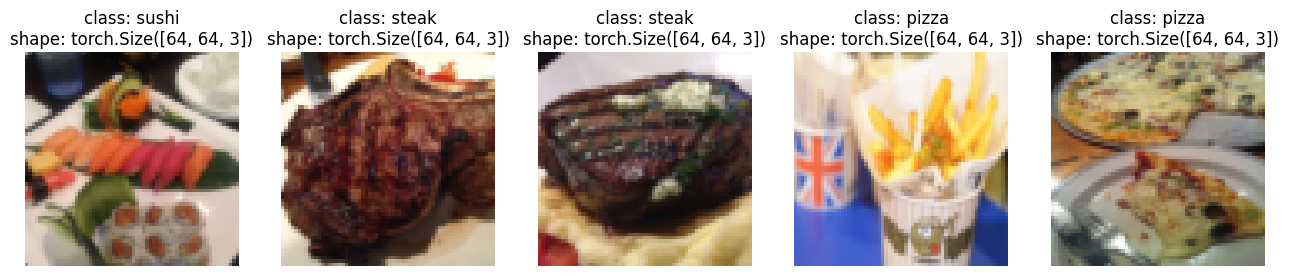

In [45]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


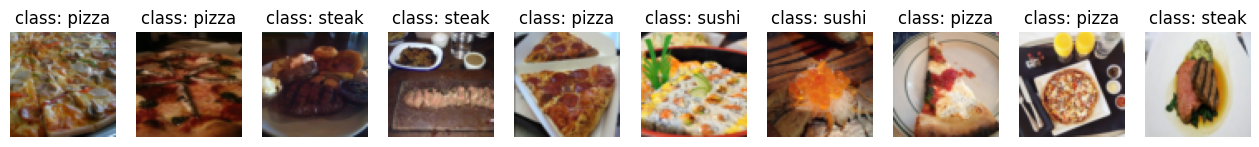

In [46]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

In [47]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x238561413f0>,
 <torch.utils.data.dataloader.DataLoader at 0x23856150430>)

In [48]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### Data Augumentation: 

In [49]:
from torchvision import transforms

train_transform=transforms.Compose([transforms.Resize(size=(224,224)),
                               transforms.TrivialAugmentWide(num_magnitude_bins=31),
                               transforms.ToTensor()])

test_transform=transforms.Compose([transforms.Resize(size=(224,224)),
                               transforms.ToTensor()])






In [50]:
# get all image paths
image_paths_list=list(image_path.glob("*/*/*.jpg"))
image_paths_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

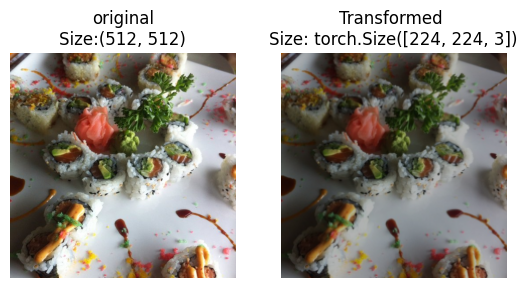

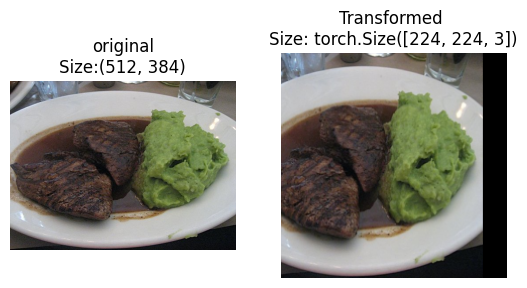

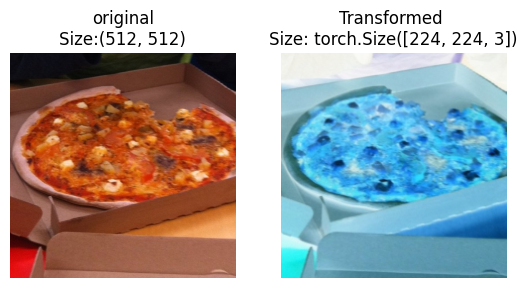

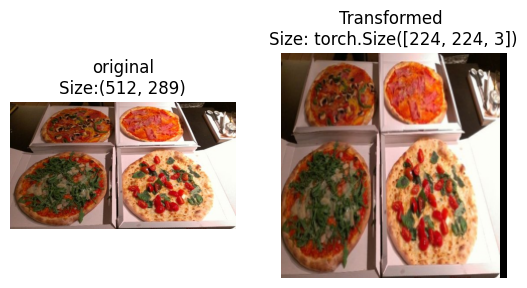

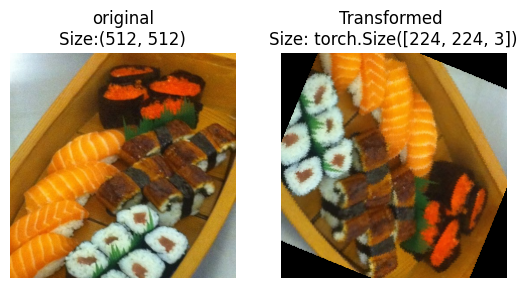

In [51]:
# plot random images
plot_transformed_images(image_paths=image_paths_list, transforms=train_transform, n=5)

### Model 0: tiny vgg model as base without data augumentation

In [52]:
# create simple transforms

simple_transforms=transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.ToTensor()])

In [53]:
# load and transform data

from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir, transform=simple_transforms )
test_data_simple=datasets.ImageFolder(root=test_dir, transform=simple_transforms )

# turn the datasets into dataladers
import os 
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple=DataLoader(dataset=train_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS,shuffle=True)
test_dataloader_simple=DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)

# we are ready to use data for training
# tiny vgg architecture
# create tiny vgg model class
import torch.nn as nn

class TinyVGG(nn.Module):
    "Model architecture : copying tiny VGG from CNN explainer"

    def __init__(self,input_shape:int, hidden_units:int, output_shape:int) -> None:
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=0,stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride ==kernel_size
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0,stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride ==kernel_size

        )
        self.classifier=nn.Sequential(nn.Flatten(),
                                      nn.Linear(in_features=hidden_units*13*13, out_features=output_shape))
    def forward(self,x):
        # # x=self.conv_block_1(x)
        # print(x.shape)
        # x=self.conv_block_2(x)
        # print(x.shape)
        # x=self.classifier(x)
        # print(x.shape)
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))  # benefits from operator fusion


model_0=TinyVGG(input_shape=3,# no of color channels
                hidden_units=10,
                output_shape=len(class_names)).to(device)


In [54]:

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Try a forward pass on single image to test model

In [55]:
image_batch, label_batch=next(iter(train_dataloader_simple))
image_batch.shape

torch.Size([32, 3, 64, 64])

In [56]:
model_0.forward(image_batch.to(device))

tensor([[-1.8085e-03, -2.6028e-02, -2.8896e-02],
        [-1.1430e-02, -1.7433e-02, -2.4393e-02],
        [-8.1187e-03, -1.7859e-02, -1.8308e-02],
        [-6.0149e-03, -2.0011e-02, -2.5030e-02],
        [ 2.5481e-04, -1.8072e-02, -2.8609e-02],
        [-2.9878e-03, -2.3668e-02, -2.4260e-02],
        [-3.8506e-03, -2.7546e-02, -2.0529e-02],
        [-2.2323e-03, -3.0963e-02, -2.6460e-02],
        [-4.5349e-03, -2.5391e-02, -2.0949e-02],
        [ 8.0497e-05, -1.6130e-02, -1.5389e-02],
        [-1.5939e-03, -3.4014e-02, -2.3149e-02],
        [-9.7412e-03, -1.6440e-02, -2.7400e-02],
        [-9.5971e-03, -1.6283e-02, -2.2789e-02],
        [-1.0560e-02, -3.0237e-02, -1.8690e-02],
        [-3.8494e-03, -2.0663e-02, -2.5996e-02],
        [-6.4213e-03, -2.2768e-02, -1.5767e-02],
        [-5.1589e-03, -2.9980e-02, -1.9426e-02],
        [ 1.4713e-03, -2.8042e-02, -3.1120e-02],
        [-4.5109e-04, -2.6618e-02, -2.1439e-02],
        [-3.0126e-03, -1.7785e-02, -1.5301e-02],
        [-1.1472e-03

# TO PRINT OUT SUMMARY OF OUR MODE, LIKE Input shape, iutput shape, no of parametrers per layer  --> torchinfo

In [57]:
from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# train the model for custom dataset
create train and test loop functions
* train step -> takes in a model and a dataloader and train the model on dataloader
* test step -> takes in a model and a dataloader and evaluates the model on dataloader




In [58]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

        

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [59]:
# let buil our opwn function to train the model:


from tqdm.auto import tqdm

def train(model:torch.nn.Module,
        train_dataloader:torch.utils.data.DataLoader, 
        test_dataloader:torch.utils.data.DataLoader, 
        optimizer: torch.optim.Optimizer,
        loss_function:torch.nn.Module=torch.nn.CrossEntropyLoss(), 
        epochs:int=10):
    
    # create empty results dictionary fo lossses, this will help us to plot losses with per epoches
    results = {"train_loss": [], 
               "train_accuracy": [], 
               "test_loss": [], 
               "test_accuracy": [] }
    # loop through training and testing step for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_accuracy=train_step(model=model, dataloader=train_dataloader, loss_fn=loss_function,optimizer=optimizer)
        test_loss, test_accuracy=test_step(model=model, dataloader=train_dataloader, loss_fn=loss_function)

        # update the dictionary
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_accuracy: {train_accuracy:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_accuracy: {test_accuracy:.4f}"
        )

        
        results["train_loss"].append(train_loss)
        results["train_accuracy"].append(train_accuracy)
        results["test_loss"].append(test_loss)
        results["test_accuracy"].append(test_accuracy)

    return results

    
    

c:\Users\swasn\anaconda3\envs\deep_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20


# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_function=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  5%|▌         | 1/20 [00:24<07:36, 24.03s/it]

Epoch: 1 | train_loss: 1.1063 | train_accuracy: 0.3047 | test_loss: 1.0956 | test_accuracy: 0.5703


 10%|█         | 2/20 [00:40<05:55, 19.78s/it]

Epoch: 2 | train_loss: 1.0835 | train_accuracy: 0.4453 | test_loss: 1.0808 | test_accuracy: 0.4023


 15%|█▌        | 3/20 [00:57<05:10, 18.24s/it]

Epoch: 3 | train_loss: 1.1063 | train_accuracy: 0.2812 | test_loss: 1.0694 | test_accuracy: 0.4023


 20%|██        | 4/20 [01:13<04:41, 17.60s/it]

Epoch: 4 | train_loss: 1.0756 | train_accuracy: 0.4766 | test_loss: 1.0543 | test_accuracy: 0.5273


 25%|██▌       | 5/20 [01:29<04:15, 17.06s/it]

Epoch: 5 | train_loss: 1.0664 | train_accuracy: 0.4023 | test_loss: 1.0395 | test_accuracy: 0.4062


 30%|███       | 6/20 [01:46<03:57, 16.95s/it]

Epoch: 6 | train_loss: 0.9961 | train_accuracy: 0.5820 | test_loss: 0.9972 | test_accuracy: 0.4844


 35%|███▌      | 7/20 [02:03<03:38, 16.82s/it]

Epoch: 7 | train_loss: 0.8926 | train_accuracy: 0.5625 | test_loss: 0.8454 | test_accuracy: 0.5859


 40%|████      | 8/20 [02:19<03:18, 16.56s/it]

Epoch: 8 | train_loss: 0.9491 | train_accuracy: 0.4531 | test_loss: 0.9066 | test_accuracy: 0.4688


 45%|████▌     | 9/20 [02:35<02:59, 16.35s/it]

Epoch: 9 | train_loss: 0.9132 | train_accuracy: 0.5078 | test_loss: 0.9443 | test_accuracy: 0.5273


 50%|█████     | 10/20 [02:51<02:44, 16.42s/it]

Epoch: 10 | train_loss: 0.8146 | train_accuracy: 0.6211 | test_loss: 0.8236 | test_accuracy: 0.6289


 55%|█████▌    | 11/20 [03:07<02:27, 16.34s/it]

Epoch: 11 | train_loss: 0.9010 | train_accuracy: 0.5352 | test_loss: 0.8262 | test_accuracy: 0.6875


 60%|██████    | 12/20 [03:23<02:10, 16.26s/it]

Epoch: 12 | train_loss: 0.8257 | train_accuracy: 0.6758 | test_loss: 0.8714 | test_accuracy: 0.5195


 65%|██████▌   | 13/20 [03:39<01:53, 16.18s/it]

Epoch: 13 | train_loss: 0.7928 | train_accuracy: 0.6172 | test_loss: 0.8908 | test_accuracy: 0.5234


 70%|███████   | 14/20 [03:56<01:37, 16.18s/it]

Epoch: 14 | train_loss: 0.7415 | train_accuracy: 0.6641 | test_loss: 0.8205 | test_accuracy: 0.5742


 75%|███████▌  | 15/20 [04:12<01:20, 16.18s/it]

Epoch: 15 | train_loss: 0.7419 | train_accuracy: 0.6836 | test_loss: 0.7583 | test_accuracy: 0.6680


 80%|████████  | 16/20 [04:28<01:04, 16.22s/it]

Epoch: 16 | train_loss: 0.8204 | train_accuracy: 0.5703 | test_loss: 0.7371 | test_accuracy: 0.7109


 85%|████████▌ | 17/20 [04:45<00:48, 16.28s/it]

Epoch: 17 | train_loss: 0.7622 | train_accuracy: 0.7109 | test_loss: 0.7348 | test_accuracy: 0.6914


 90%|█████████ | 18/20 [05:01<00:32, 16.20s/it]

Epoch: 18 | train_loss: 0.7527 | train_accuracy: 0.6758 | test_loss: 0.7055 | test_accuracy: 0.7070


 95%|█████████▌| 19/20 [05:16<00:16, 16.08s/it]

Epoch: 19 | train_loss: 0.6769 | train_accuracy: 0.7266 | test_loss: 0.7217 | test_accuracy: 0.7383


100%|██████████| 20/20 [05:33<00:00, 16.66s/it]

Epoch: 20 | train_loss: 0.6863 | train_accuracy: 0.7148 | test_loss: 0.6586 | test_accuracy: 0.7188
Total training time: 333.178 seconds


The model is clearly overfitting test error> train error

In [61]:
model_0_results.keys()

dict_keys(['train_loss', 'train_accuracy', 'test_loss', 'test_accuracy'])

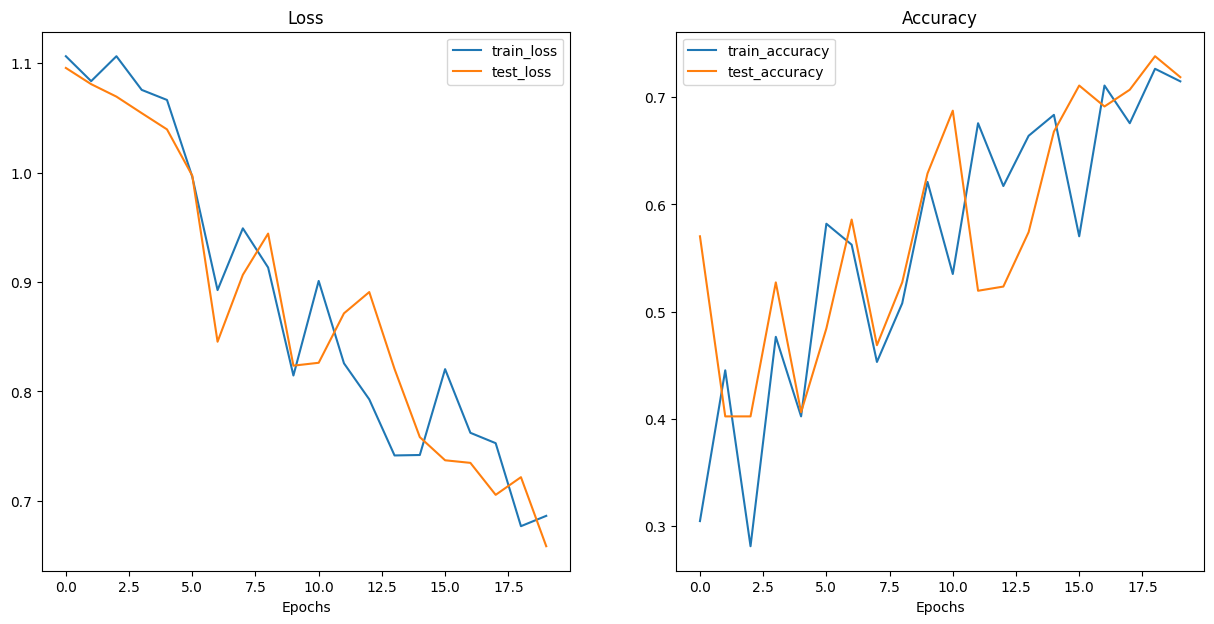

In [62]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary 
    
    Args: 
        results (dict): Dicionary containing list of values eg.
            {"train_loss": [...],
             "train_accuracy": [...],
             "test_loss": [...],
             "test_accuracy": [...]}    
    """
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_accuracy']
    test_accuracy = results['test_accuracy']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


plot_loss_curves(results=model_0_results)



In [63]:
# lets build train TinyVGG with Data Augumentation
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

torch.manual_seed(42) 
torch.cuda.manual_seed(42)

train_transform_trivial_augument=transforms.Compose([transforms.Resize(size=(64,64)),
                                                    transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                                    transforms.ToTensor()])
test_transform_trivial=transforms.Compose([transforms.Resize(size=(64,64)),
                                                    transforms.ToTensor()])


train_data_augumented=ImageFolder(root=train_dir,transform=train_transform_trivial_augument)
test_data_simple=ImageFolder(root=test_dir, transform=test_transform_trivial)

# Dataloader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_augumented=DataLoader(dataset=train_data_augumented,batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_simple=DataLoader(dataset=test_data_simple,batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=3).to(device)


# train the model
optimizer=torch.optim.Adam(lr=0.001,params=model_1.parameters())
loss_function=torch.nn.CrossEntropyLoss()
model_1_results=train(model=model_1, train_dataloader=train_dataloader_augumented, test_dataloader=test_dataloader_simple,optimizer=optimizer,loss_function=loss_function, epochs=20)




  5%|▌         | 1/20 [00:16<05:11, 16.39s/it]

Epoch: 1 | train_loss: 1.1069 | train_accuracy: 0.3047 | test_loss: 1.0970 | test_accuracy: 0.4102


 10%|█         | 2/20 [00:32<04:56, 16.47s/it]

Epoch: 2 | train_loss: 1.0858 | train_accuracy: 0.4375 | test_loss: 1.0846 | test_accuracy: 0.4023


 15%|█▌        | 3/20 [00:49<04:37, 16.31s/it]

Epoch: 3 | train_loss: 1.1003 | train_accuracy: 0.2812 | test_loss: 1.0776 | test_accuracy: 0.4023


 20%|██        | 4/20 [01:06<04:29, 16.84s/it]

Epoch: 4 | train_loss: 1.0859 | train_accuracy: 0.4102 | test_loss: 1.0827 | test_accuracy: 0.3477


 25%|██▌       | 5/20 [01:23<04:09, 16.67s/it]

Epoch: 5 | train_loss: 1.0857 | train_accuracy: 0.3164 | test_loss: 1.0679 | test_accuracy: 0.4844


 30%|███       | 6/20 [01:39<03:54, 16.74s/it]

Epoch: 6 | train_loss: 1.0759 | train_accuracy: 0.4062 | test_loss: 1.0619 | test_accuracy: 0.3984


 35%|███▌      | 7/20 [01:56<03:38, 16.79s/it]

Epoch: 7 | train_loss: 1.1026 | train_accuracy: 0.3711 | test_loss: 1.0611 | test_accuracy: 0.3984


 40%|████      | 8/20 [02:13<03:22, 16.90s/it]

Epoch: 8 | train_loss: 1.0625 | train_accuracy: 0.4062 | test_loss: 1.0645 | test_accuracy: 0.3906


 45%|████▌     | 9/20 [02:30<03:03, 16.71s/it]

Epoch: 9 | train_loss: 1.0430 | train_accuracy: 0.4883 | test_loss: 1.0211 | test_accuracy: 0.5820


 50%|█████     | 10/20 [02:46<02:45, 16.54s/it]

Epoch: 10 | train_loss: 1.0552 | train_accuracy: 0.4375 | test_loss: 1.0083 | test_accuracy: 0.4297


 55%|█████▌    | 11/20 [03:02<02:28, 16.46s/it]

Epoch: 11 | train_loss: 1.0271 | train_accuracy: 0.4219 | test_loss: 1.0404 | test_accuracy: 0.4844


 60%|██████    | 12/20 [03:18<02:10, 16.29s/it]

Epoch: 12 | train_loss: 0.9932 | train_accuracy: 0.4531 | test_loss: 1.0179 | test_accuracy: 0.4766


 65%|██████▌   | 13/20 [03:34<01:53, 16.28s/it]

Epoch: 13 | train_loss: 0.9934 | train_accuracy: 0.5039 | test_loss: 1.0924 | test_accuracy: 0.4414


 70%|███████   | 14/20 [03:50<01:37, 16.19s/it]

Epoch: 14 | train_loss: 1.1550 | train_accuracy: 0.3789 | test_loss: 0.9638 | test_accuracy: 0.5430


 75%|███████▌  | 15/20 [04:06<01:20, 16.18s/it]

Epoch: 15 | train_loss: 0.9272 | train_accuracy: 0.5703 | test_loss: 1.0647 | test_accuracy: 0.4727


 80%|████████  | 16/20 [04:23<01:04, 16.15s/it]

Epoch: 16 | train_loss: 0.9430 | train_accuracy: 0.4844 | test_loss: 0.9389 | test_accuracy: 0.5820


 85%|████████▌ | 17/20 [04:43<00:52, 17.52s/it]

Epoch: 17 | train_loss: 0.9589 | train_accuracy: 0.4570 | test_loss: 0.9074 | test_accuracy: 0.5938


 90%|█████████ | 18/20 [04:59<00:34, 17.05s/it]

Epoch: 18 | train_loss: 0.9297 | train_accuracy: 0.4453 | test_loss: 0.8986 | test_accuracy: 0.6133


 95%|█████████▌| 19/20 [05:15<00:16, 16.72s/it]

Epoch: 19 | train_loss: 0.9492 | train_accuracy: 0.6133 | test_loss: 0.9833 | test_accuracy: 0.4453


100%|██████████| 20/20 [05:31<00:00, 16.57s/it]

Epoch: 20 | train_loss: 0.9859 | train_accuracy: 0.4648 | test_loss: 0.8644 | test_accuracy: 0.6016


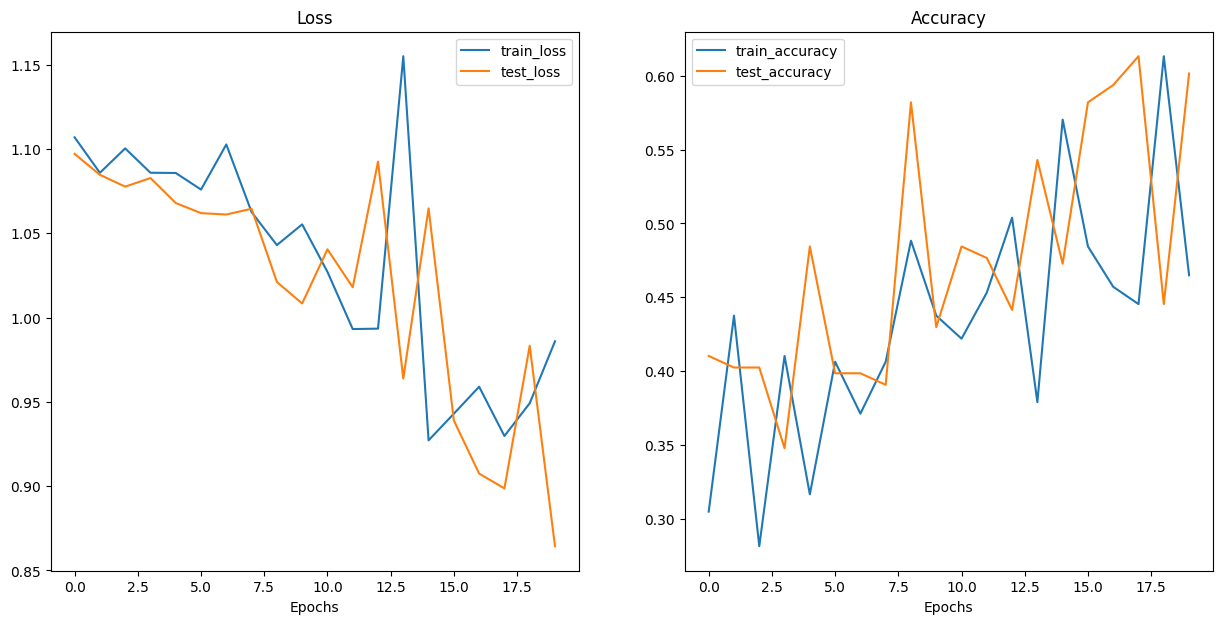

In [64]:
plot_loss_curves(results=model_1_results)


In [67]:
# compare model results
import pandas as pd
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)

model_1_df

train_loss  train_accuracy  test_loss  test_accuracy
0     1.106851        0.304688   1.097049       0.410156
1     1.085839        0.437500   1.084632       0.402344
2     1.100309        0.281250   1.077632       0.402344
3     1.085870        0.410156   1.082737       0.347656
4     1.085730        0.316406   1.067917       0.484375
5     1.075879        0.406250   1.061902       0.398438
6     1.102643        0.371094   1.061084       0.398438
7     1.062524        0.406250   1.064515       0.390625
8     1.042957        0.488281   1.021089       0.582031
9     1.055247        0.437500   1.008332       0.429688
10    1.027093        0.421875   1.040445       0.484375
11    0.993153        0.453125   1.017939       0.476562
12    0.993407        0.503906   1.092420       0.441406
13    1.154976        0.378906   0.963829       0.542969
14    0.927158        0.570312   1.064729       0.472656
15    0.942975        0.484375   0.938928       0.582031
16    0.958949        0.457031   0.907428       0.593750
17    0.929733        0.445312   0.898640       0.613281
18    0.949158        0.613281   0.983251       0.445312
19    0.985900        0.464844   0.864356       0.601562

Make Prediction on custom image

In [69]:
# Download custom image
import requests
import torchvision
# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")


# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")


Custom image tensor:
tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [70]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

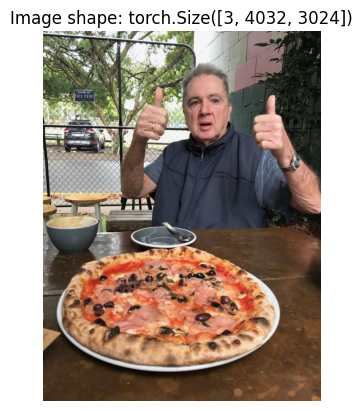

In [71]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [72]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


c:\Users\swasn\anaconda3\envs\deep_learning\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [73]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [74]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-0.1090, -0.0666, -0.5444]], device='cuda:0')
Prediction probabilities: tensor([[0.3717, 0.3878, 0.2405]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


In [75]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'steak'

In [76]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

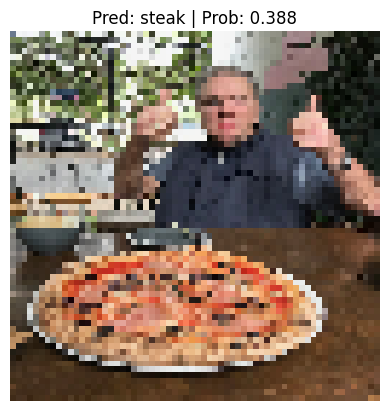

In [77]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

### Main takeaways
We've covered a fair bit in this module.

Let's summarise it with a few dot points.

* PyTorch has many in-built functions to deal with all kinds of data, from vision to text to audio to recommendation systems.
* If PyTorch's built-in data loading functions don't suit your requirements, you can write code to create your own custom datasets by subclassing torch.utils.data.Dataset.
* torch.utils.data.DataLoader's in PyTorch help turn your Dataset's into iterables that can be used when training and testing a model.
* A lot of machine learning is dealing with the balance between overfitting and underfitting (we discussed different methods for each above, so a good exercise would be to research more and writing code to try out the different techniques).
* Predicting on your own custom data with a trained model is possible, as long as you format the data into a similar format to what the model was trained on. 
Make sure you take care of the three big PyTorch and deep learning errors:
1. Wrong datatypes - Your model expected torch.float32 when your data is torch.uint8.
2. Wrong data shapes - Your model expected [batch_size, color_channels, height, width] when your data is [color_channels, height, width].
3. Wrong devices - Your model is on the GPU but your data is on the CPU.